In [2813]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df = df.drop(columns=['sepal length (cm)','sepal width (cm)'])
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


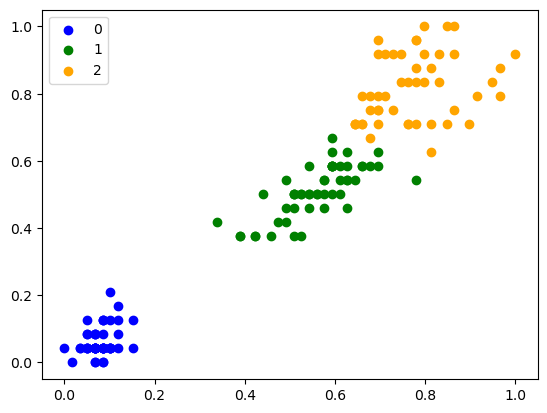

In [2839]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df)
df['clusters'] = y_predicted
df.head()

df0=df[df.clusters==0]
df1=df[df.clusters==1]
df2=df[df.clusters==2]

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], label='0', color='blue')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], label='1', color='green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], label='2', color='orange')
plt.legend()
plt.show()

In [2841]:
scaler = MinMaxScaler()
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])
df

,petal length (cm),petal width (cm),clusters
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2


In [2843]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df.drop(columns='clusters'))

df['clusters'] = y_predicted
df

,petal length (cm),petal width (cm),clusters
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2


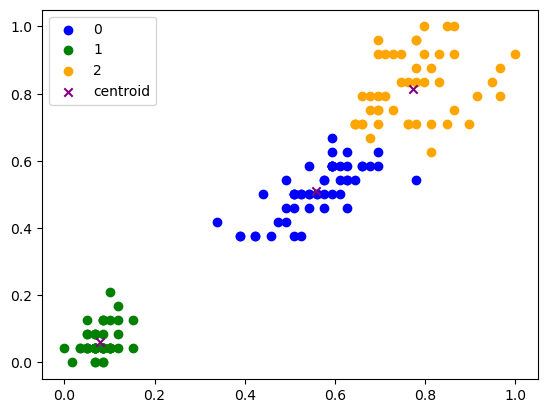

array([[0.55867014, 0.51041667],
       [0.07830508, 0.06083333],
       [0.7740113 , 0.81510417]])

In [2845]:
df0=df[df.clusters==0]
df1=df[df.clusters==1]
df2=df[df.clusters==2]

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], label='0', color='blue')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], label='1', color='green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], label='2', color='orange')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], label='centroid', color='purple', marker='x')

plt.legend()
plt.show()
km.cluster_centers_

In [2847]:
k_range = range(1,10)
sse = []

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

sse

[28.368353219727194,
 5.176463590044368,
 1.7018746881920963,
 1.1615234094205578,
 0.8535683225340072,
 0.7953258939815298,
 0.6010929752278547,
 0.5639677594985762,
 0.41363725779406146]

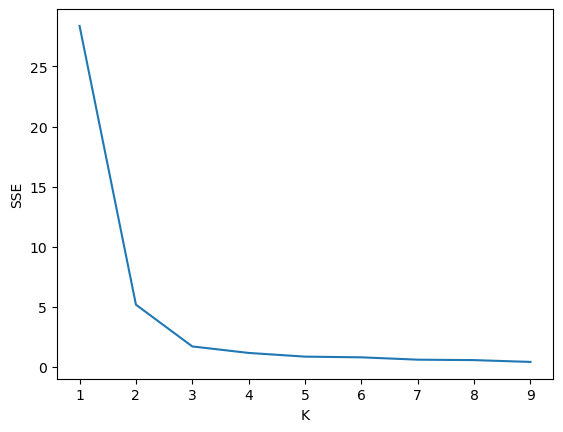

In [2849]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range, sse)
plt.show()